## 1. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
toyota = pd.read_csv('ToyotaCorolla.csv')

In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
toyota=toyota[['Price', 'Age_08_04', 'KM','HP','cc', 'Doors','Gears', 'Quarterly_Tax', 'Weight']]

## 3. Data Understanding

### 3.1 Initial Analysis

In [6]:
toyota.shape

(1436, 9)

In [7]:
toyota.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
toyota.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

### 3.2 Data Cleaning

#### Data is good to go

### 3.3 Check Assumption Test

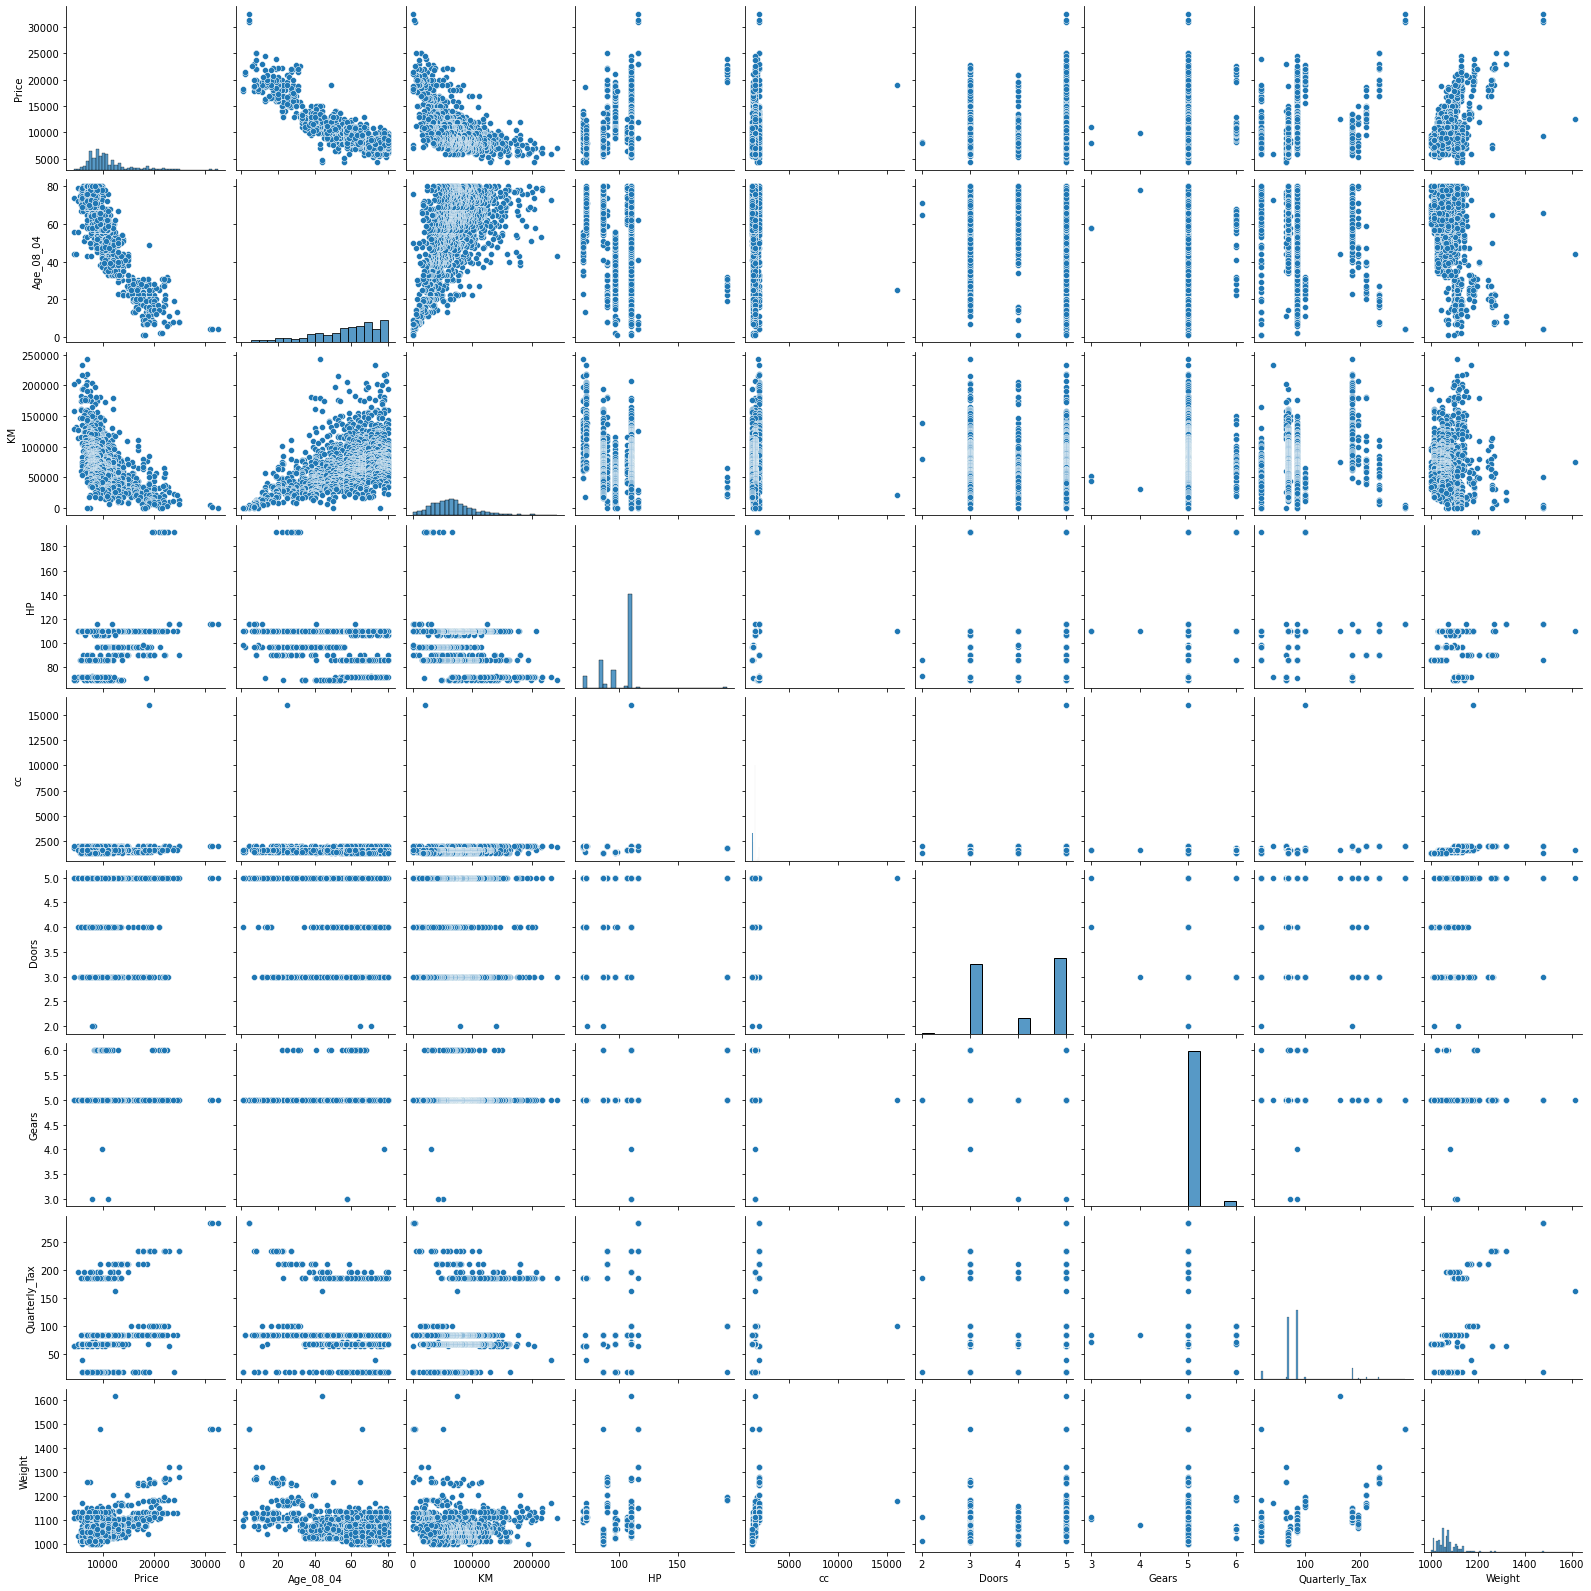

In [9]:
sns.pairplot(toyota)

#### Linearity Check

In [10]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [11]:
from scipy import stats

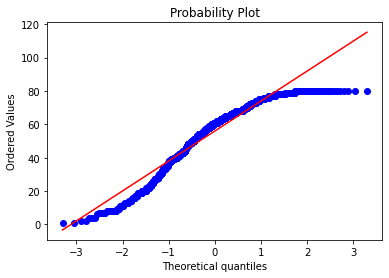

In [12]:
stats.probplot(toyota['Age_08_04'],plot=plt)
plt.show()

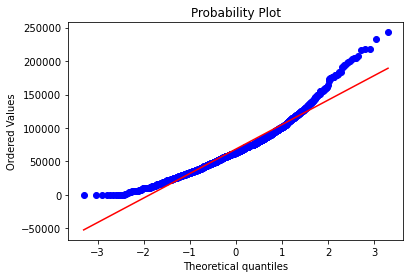

In [13]:
stats.probplot(toyota['KM'],plot=plt)
plt.show()

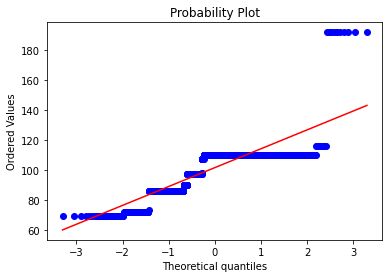

In [14]:
stats.probplot(toyota['HP'],plot=plt)
plt.show()

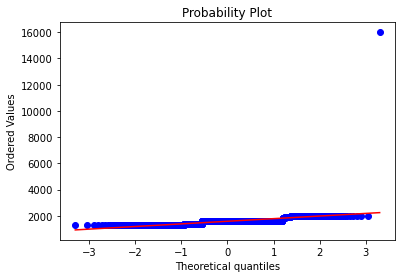

In [15]:
stats.probplot(toyota['cc'],plot=plt)
plt.show()

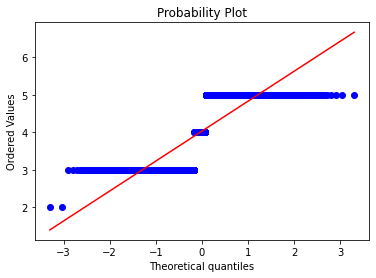

In [16]:
stats.probplot(toyota['Doors'],plot=plt)
plt.show()

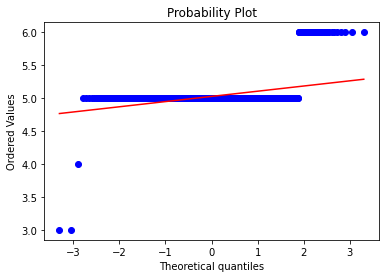

In [17]:
stats.probplot(toyota['Gears'],plot=plt)
plt.show()

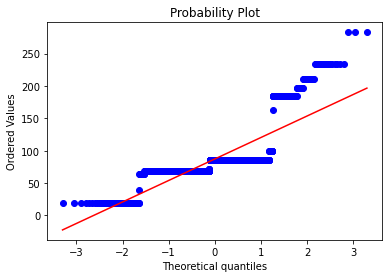

In [18]:
stats.probplot(toyota['Quarterly_Tax'],plot=plt)
plt.show()

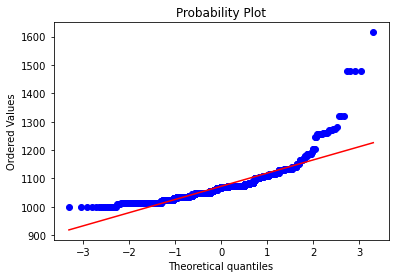

In [19]:
stats.probplot(toyota['Weight'],plot=plt)
plt.show()

#### Normality Test is failed

### Multicollinearity Test

* corr()
* VIF

In [20]:
toyota.corr().round(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.00,-0.88,-0.57,0.31,0.13,0.19,0.06,0.22,0.58
Age_08_04,-0.88,1.00,0.51,-0.16,-0.10,-0.15,-0.01,-0.20,-0.47
KM,-0.57,0.51,1.00,-0.33,0.10,-0.04,0.02,0.28,-0.03
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
cc,0.13,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.19,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.02,0.21,0.01,-0.16,1.00,-0.01,0.02
Quarterly_Tax,0.22,-0.20,0.28,-0.30,0.31,0.11,-0.01,1.00,0.63
Weight,0.58,-0.47,-0.03,0.09,0.34,0.30,0.02,0.63,1.00


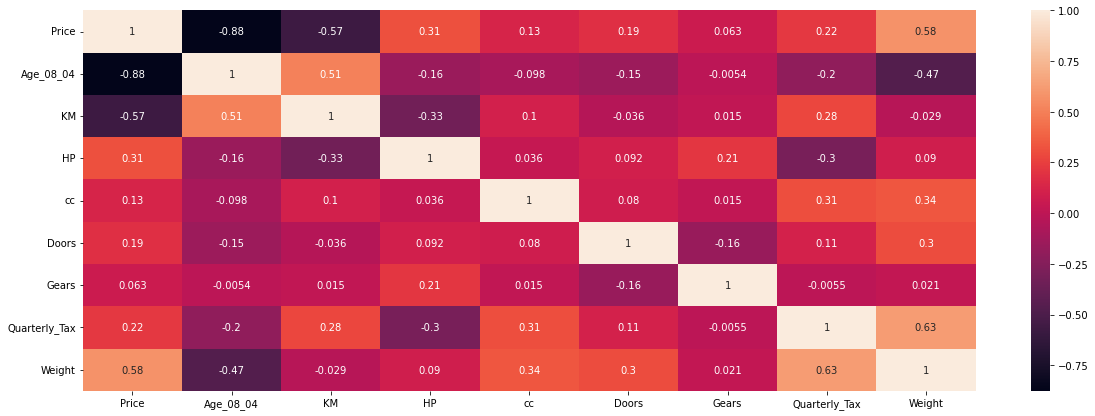

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(toyota.corr(),annot=True)
plt.show()

#### There is multicollinearity. Hence Multicollinearity test is failed

### No Auto Regression

#### There is no time based input feature. Hence there is no auto regression.

## EDA

### Box Plot - Outlier Detection

In [22]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

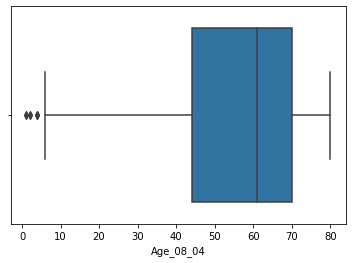

In [23]:
sns.boxplot(x='Age_08_04',data=toyota)
plt.show()

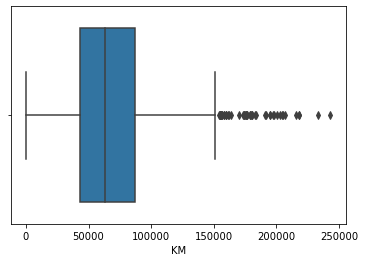

In [24]:
sns.boxplot(x='KM',data=toyota)
plt.show()

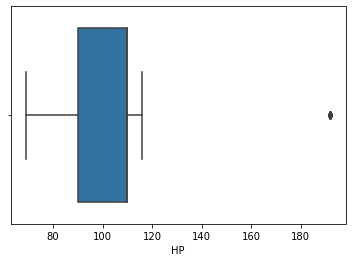

In [25]:
sns.boxplot(x='HP',data=toyota)
plt.show()

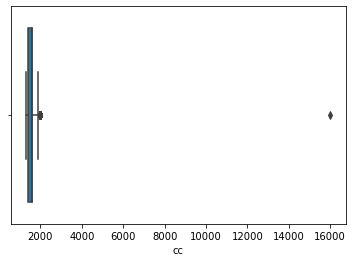

In [26]:
sns.boxplot(x='cc',data=toyota)
plt.show()

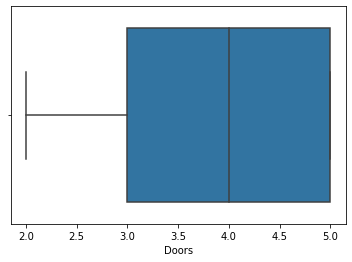

In [27]:
sns.boxplot(x='Doors',data=toyota)
plt.show()

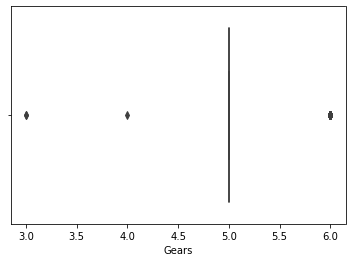

In [28]:
sns.boxplot(x='Gears',data=toyota)
plt.show()

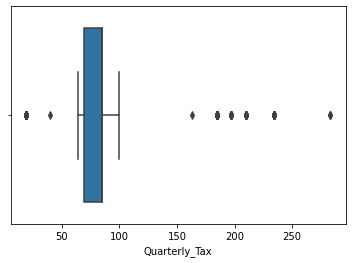

In [29]:
sns.boxplot(x='Quarterly_Tax',data=toyota)
plt.show()

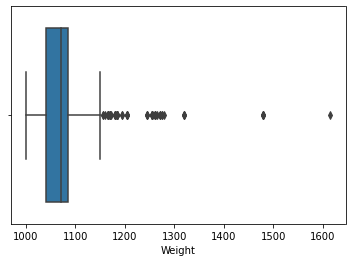

In [30]:
sns.boxplot(x='Weight',data=toyota)
plt.show()

#### There is no Outlier Present in the Data

### 4. Model Building

In [31]:
X=toyota.drop('Price',axis=1)
y=toyota[['Price']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.2,random_state=12,shuffle=True,)

### 5. Model Training

In [32]:
from sklearn.linear_model import LinearRegression
startup_model=LinearRegression().fit(X,y)

### 6. Model Testing || 7. Model Evaluation

#### #### Model Building and Training and Evaluation Using sklearn

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
y_train_pred=startup_model.predict(X_train)

In [35]:
mean_absolute_error(y_train,y_train_pred)

1003.3995457676617

In [36]:
mean_squared_error(y_train,y_train_pred)

1774203.1915936929

In [37]:
r2_score(y_train,y_train_pred)

0.8650547238983721

In [38]:
y_test_pred=startup_model.predict(X_test)

In [39]:
mean_absolute_error(y_test,y_test_pred)

994.1607144268609

In [40]:
mean_squared_error(y_test,y_test_pred)

1857632.8808989641

In [41]:
r2_score(y_test,y_test_pred)

0.8584446539234227

#### Model Building and Training and Evaluation Using Statsmodels

In [42]:
import statsmodels.formula.api as smf

In [43]:
statsmodel=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',toyota).fit()

In [44]:
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:42:13   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
statsmodel.pvalues<0.05

Intercept         True
Age_08_04         True
KM                True
HP                True
cc               False
Doors            False
Gears             True
Quarterly_Tax     True
Weight            True
dtype: bool

#### From above model, it is evident that cc and Doors are not significant features

In [46]:
statsmodel1=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',toyota).fit()

In [47]:
statsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:42:13   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age_08_04      -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
statsmodel1.pvalues<0.05

Intercept        True
Age_08_04        True
KM               True
HP               True
Gears            True
Quarterly_Tax    True
Weight           True
dtype: bool

All are significant Features after removing cc and Doors

### End !!!